In [1]:
import pandas as pd
import DataBaseCreation as dbm
import matplotlib.pyplot as plt

Connexion réussie à la base de données


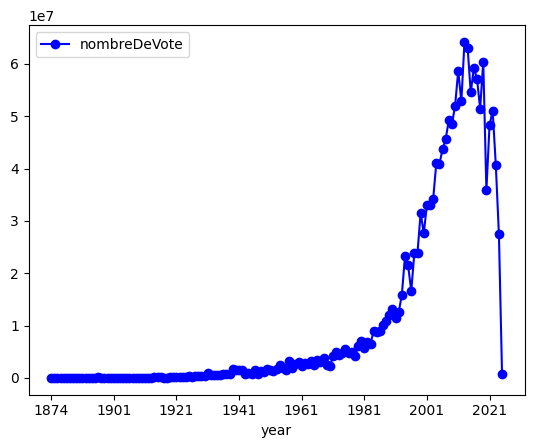

In [ ]:
nombreVote = """Select SUM(cast(test.ratings."numVotes" as int)) , test.film."startYear"
from test.ratings
join test.film on test.film.tconst = test.ratings.tconst 
where "startYear" != '\\N'  -- Escaping the backslash
group by "startYear";"""

bdm = dbm.DataBaseManager("test")
connection = bdm.se_connecter_a_la_base_de_donnees()
def GetFrame(request):
    try:
        curseur = connection.cursor()
        curseur.execute(nombreVote)
        frame = pd.DataFrame(curseur.fetchall())
        frame.columns = ["nombreDeVote","year"]
    except:
        pass
frame = GetFrame(nombreVote)
frame.plot(x='year', y='nombreDeVote', kind='line', marker='o', linestyle='-', color='b')
connection.close()


In [14]:
requete = f""" select count(*) , test.ratings."numVotes"
from test.ratings
group by test.ratings."numVotes"; """

def GetFrame(request,columns):
    bdm = dbm.DataBaseManager()
    connection = bdm.se_connecter_a_la_base_de_donnees()
    try:
        curseur = connection.cursor()
        curseur.execute(request)
        frame = pd.DataFrame(curseur.fetchall())
        frame.columns = columns
    except:
        pass
    finally:
        connection.close()
        return frame

data = GetFrame(requete,["nombreFilm","nombreVote"])


Connexion réussie à la base de données


In [15]:
data["nombreFilm"] = data["nombreFilm"].apply(int)
data["nombreVote"] = data["nombreVote"].apply(int)

<Axes: xlabel='nombreVote'>

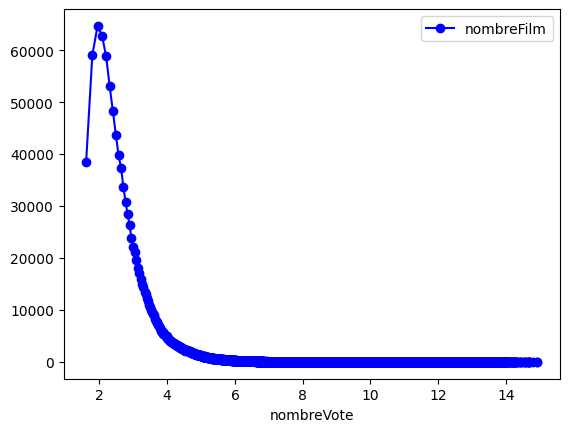

In [ ]:
import math
df_sorted = data.sort_values(by='nombreVote')
df_sorted["nombreVote"]= data["nombreVote"].apply(math.log)
df_sorted.plot(x="nombreVote",y="nombreFilm", kind='line', marker='o', linestyle='-', color='b')